In [150]:
from pytheus import help_functions as hf, theseus as th, fancy_classes as fc, graphplot as gp
from neuralnet import load_model
from datagen import generatorGraphFidelity
import matplotlib.pyplot as plt
import torch
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm


directory = 'dreamfiles/dream4qnrand_penul_888'
colors = cm.rainbow(np.linspace(0, 1, 100))
data = []
for filename in os.listdir(directory):
    df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
    data.append([list(df.iloc[:, 0]), list(df.iloc[:, 1]), filename])

<Figure size 720x720 with 0 Axes>

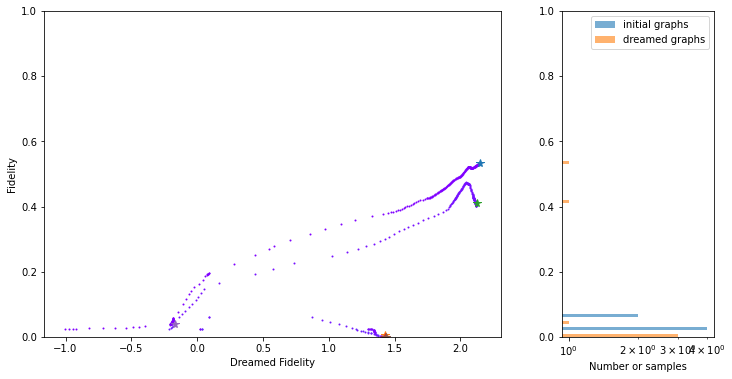

In [77]:
plt.figure(figsize=(10, 10))

#data = sorted(data, key=lambda x: x[0][0])
init = []
final = []
for ii, sample in enumerate(data):
    init.append(sample[0][0])
    final.append(sample[0][-1])
    
    
f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(12, 6))
#plt.subplot(211)
for ii, sample in enumerate(data):
    #print(len(sample[1]))
    #print(sample)
    c = colors[ii]
    a0.scatter(sample[1], sample[0], color=c, s=1)
    a0.plot([sample[1][-1]], [sample[0][-1]], marker='*', markersize=8)

a0.set_ylim([0, 1])
a0.set_xlabel('Dreamed Fidelity')
a0.set_ylabel('Fidelity')

#plt.subplot(212)
bins = np.arange(0, 1, 0.01)  # fixed bin size
a1.set_ylim([0, 1])
a1.set_xscale('log')
a1.set_xlabel('Number or samples')
a1.hist(init, bins=bins, alpha=0.6, orientation="horizontal",label='initial graphs')
a1.hist(final, bins=bins, alpha=0.6, orientation="horizontal",label='dreamed graphs')
a1.legend(prop={'size': 10})

24
{(0, 1, 0, 0): 1.9005392789840698,
 (0, 1, 0, 1): -2.1142635345458984,
 (0, 1, 1, 0): 2.055342197418213,
 (0, 2, 0, 0): -0.7815952897071838,
 (0, 2, 0, 1): -1.623945951461792,
 (0, 2, 1, 1): -0.9623316526412964,
 (0, 3, 0, 1): 0.7959599494934082,
 (1, 2, 0, 0): -0.7672758102416992,
 (1, 2, 1, 1): 0.9955640435218811,
 (1, 3, 0, 0): 1.011086344718933,
 (1, 3, 0, 1): 2.1865813732147217,
 (1, 3, 1, 0): -1.9404937028884888,
 (1, 3, 1, 1): -0.7367905378341675,
 (2, 3, 1, 0): 2.5765278339385986,
 (2, 3, 1, 1): -1.0060606002807617}


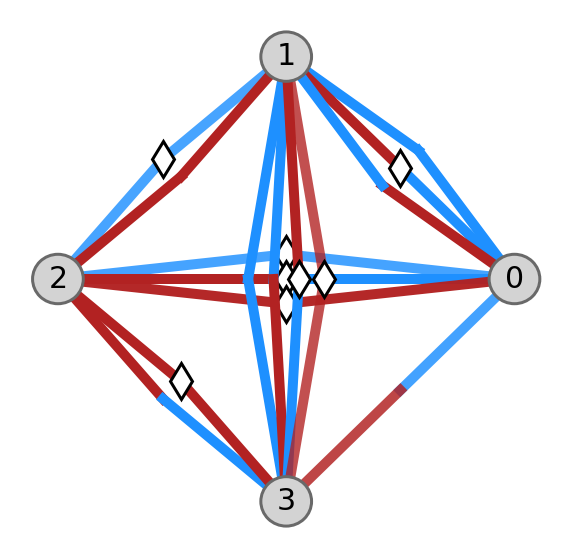

2.9618496366488076e-05
{((0, 0), (1, 0), (2, 1), (3, 0)): 0.30842174107531733,
 ((0, 0), (1, 0), (2, 1), (3, 1)): -0.5176569019485201,
 ((0, 0), (1, 1), (2, 1), (3, 0)): -0.2175830455785179,
 ((0, 0), (1, 1), (2, 1), (3, 1)): 0.39002446566897925,
 ((0, 1), (1, 0), (2, 1), (3, 0)): 0.40960442429421423,
 ((0, 1), (1, 0), (2, 1), (3, 1)): -0.39533098907619746,
 ((0, 0), (1, 0), (2, 0), (3, 0)): -0.07488332985232961,
 ((0, 0), (1, 0), (2, 0), (3, 1)): -0.21981369769652073,
 ((0, 0), (1, 1), (2, 0), (3, 0)): 0.1437173301654681,
 ((0, 0), (1, 1), (2, 0), (3, 1)): 0.054568365169691484,
 ((0, 1), (1, 1), (2, 1), (3, 0)): 0.1769505748980956,
 ((0, 1), (1, 1), (2, 1), (3, 1)): 0.06718677265232283}


In [180]:
DIM = [2] * 4
kets = hf.makeState('0000+1111')
state = fc.State(kets, normalize=True)

# This seems to reconstruct the graph that was observed to have the maximum actual fidelity


fids = [data[ii][1][-1] for ii in range(len(data))]
#ind = np.argmax(fids)
filename = data[5][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[-1, 2])
edges = th.buildAllEdges(dimensions=4 * [2])
print(len(edges))
graph = fc.Graph(edges=edges, weights=weights)
graph.purge(threshold=7e-1, update=True)
graph = fc.Graph(graph.edges, weights=graph.weights)
print(graph)
gp.graphPlot(graph)
graph.getState()
dreamstate = graph.state
dreamstate.normalize()
print((state @ graph.state) ** 2)
print(graph.state)

In [124]:
data

[[[0.0249999999999999,
   0.025004750300813,
   0.0253287285722877,
   0.0255817794906867,
   0.0259044970825434,
   0.0265953955309422,
   0.0273025886698673,
   0.0279266425647704,
   0.0285495177923301,
   0.0300280443669184,
   0.0314454931558269,
   0.0328071092894114,
   0.0366574351683174,
   0.0383537535674656,
   0.0384192006619504,
   0.0384857451346596,
   0.0385508917773963,
   0.0386204722222169,
   0.03869455534022,
   0.0387734084248968,
   0.0388571679395937,
   0.0389454643994305,
   0.0390390560257884,
   0.0391382088028036,
   0.0392431770856413,
   0.0393541766560321,
   0.0394842035176197,
   0.039630082938319,
   0.0397844542198243,
   0.0399476933759777,
   0.0401203481580029,
   0.0403028378232561,
   0.0404957170615245,
   0.0406995622241229,
   0.0409149131764463,
   0.0411422622206198,
   0.0413825300175597,
   0.0416362775140748,
   0.0419041896883932,
   0.0421872701701671,
   0.0424860002661391,
   0.0428013708062493,
   0.0431343399313484,
   0.0434858623

In [158]:
weights = eval(df.iloc[-1, 2])
print(weights)
len(weights)

[0.9917380809783936, -0.3486596345901489, 0.4398428797721863, 0.3347225785255432, -0.3406654894351959, 0.18200649321079254, 0.19282166659832, -0.928149938583374, -0.06282554566860199, 0.5989328026771545, -0.3080010414123535, 0.3248438537120819, -0.6067101955413818, -0.26401564478874207, 0.009973568841814995, 0.9690288305282593, 0.3554570972919464, 0.5171765089035034, 0.1709333211183548, -0.6941559910774231, 0.09892351925373077, -0.7671958208084106, 0.5495939254760742, -0.8696606755256653]


24

In [179]:
filename

'dream2_0.csv'

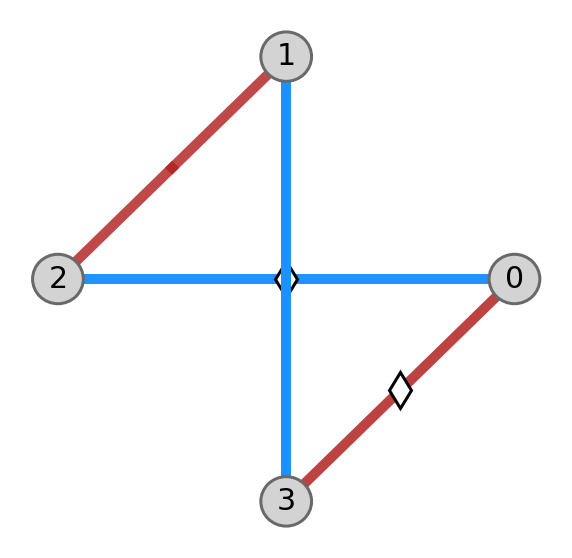

0.9552567308898267
{((0, 0), (1, 0), (2, 0), (3, 0)): -0.8406781269407081,
 ((0, 1), (1, 1), (2, 1), (3, 1)): -0.5415351206371226}


In [57]:
newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=7e-1, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)
print(newgraph.state)

In [55]:
np.max(fids)

0.7558209868147877

In [48]:
filename

'dream38_0.csv'

In [14]:
final

[0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017966961,
 0.3052167017

In [97]:
dreamstate

{((0, 0), (1, 0), (2, 0), (3, 0)): 0.6090977429038597,
 ((0, 0), (1, 1), (2, 0), (3, 1)): 0.4994059570260126,
 ((0, 1), (1, 1), (2, 0), (3, 1)): 0.4652025868987332,
 ((0, 1), (1, 1), (2, 1), (3, 1)): 0.40395566937361144}

24


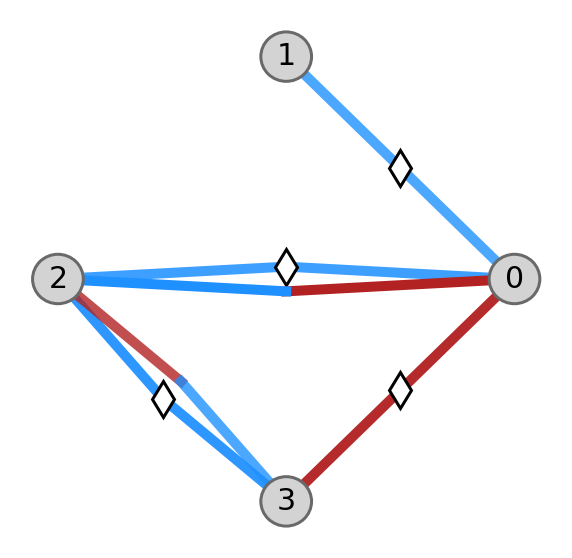

0.30035898178519604


In [95]:
# This seems to reconstruct the graph that was observed to have the maximum predicted fidelity

preds = [data[ii][1][-1] for ii in range(len(data))]
ind = np.argmax(preds)
filename = data[ind][2]
df = pd.read_csv(f'{directory}/{filename}', sep=";", names=['fidelity', 'activation', 'graph'])
weights = eval(df.iloc[-1, 2])
edges = th.buildAllEdges(dimensions=4 * [2])
print(len(edges))
graph = fc.Graph(edges=edges, weights=weights)

newweights = [w / max(graph.weights) for w in graph.weights]
newgraph = fc.Graph(edges=graph.edges, weights=newweights)
newgraph.purge(threshold=7e-1, update=True)
newgraph = fc.Graph(newgraph.edges, weights=newgraph.weights)
gp.graphPlot(newgraph)
newgraph.getState()
dreamstate = newgraph.state
dreamstate.normalize()
print((state @ newgraph.state) ** 2)